<a href="https://colab.research.google.com/github/doowilliams/data_science_portfolio/blob/main/Food_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN) for Food Image Classification

In [1]:
import zipfile
 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-11 02:08:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 2a00:1450:4013:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  34.4MB/s    in 15s     

2023-02-11 02:08:44 (34.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [3]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# let's get the class name
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3452947.jpg']
Image shape: (307, 512, 3)


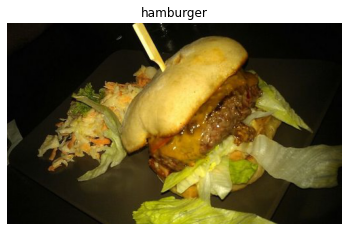

In [6]:
# visualize the image
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

['173288.jpg']
Image shape: (382, 512, 3)


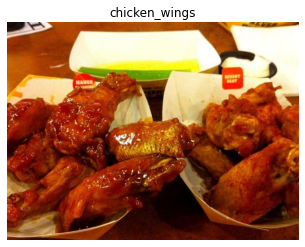

In [7]:
# visualize the image
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model) 

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
from keras.layers.attention.multi_head_attention import activation
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout

# Create our model
model = Sequential([
    Conv2D(32, 3, input_shape=(224, 224,3)),
    Activation(activation="relu"),
    MaxPool2D(3),
    Conv2D(64, 3, activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(65, activation="relu"),
    Dense(10, activation="softmax") 

])

model.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [10]:
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

history = model.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks=[early_stopping] )

Epoch 1/5
235/235 [==============================] - 62s 222ms/step - loss: 2.3823 - accuracy: 0.1023 - val_loss: 2.2980 - val_accuracy: 0.1316
Epoch 2/5
235/235 [==============================] - 53s 225ms/step - loss: 2.2464 - accuracy: 0.1471 - val_loss: 2.1739 - val_accuracy: 0.1896
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 2.1261 - accuracy: 0.2312 - val_loss: 2.1151 - val_accuracy: 0.2432
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 1.9570 - accuracy: 0.3115 - val_loss: 1.9884 - val_accuracy: 0.2984
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 1.6855 - accuracy: 0.4159 - val_loss: 1.9636 - val_accuracy: 0.3224


### Evaluat the model

In [11]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history['accuracy']
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title('loss')
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title('accuracy')
  plt.xlabel("epochs")
  plt.legend()

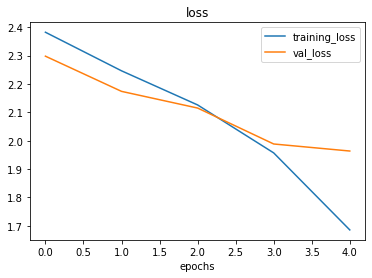

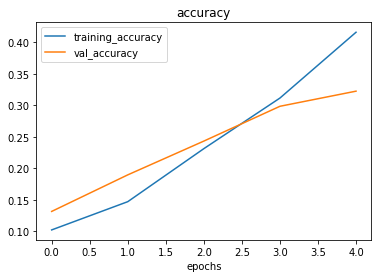

In [12]:
# Check out the loss and accuracy of model
plot_loss_curves(history)

Well... it seems our model is overfitting the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

### Trying to reduce overfitting with data augmentation



In [13]:
# Create an augmented data generetor instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [24]:
# Create our model
model_1 = Sequential([
    Conv2D(32, 3, input_shape=(224, 224,3)),
    Activation(activation="relu"),
    MaxPool2D(3),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(2),
    Conv2D(64, 3, activation="relu"),
    MaxPool2D(2),
    Dropout(0.1), # add dropout with a rate of 0.2
    Flatten(),
    Dense(65, activation="relu"),
    Dense(10, activation="softmax") 

])

model_1.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [25]:
# Fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

history_1 = model_1.fit(train_data_augmented, # the augmented data
                        epochs=100,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks=[early_stopping] )

Epoch 1/100
235/235 [==============================] - 134s 560ms/step - loss: 2.1842 - accuracy: 0.1989 - val_loss: 1.9789 - val_accuracy: 0.3100
Epoch 2/100
235/235 [==============================] - 125s 533ms/step - loss: 2.0502 - accuracy: 0.2715 - val_loss: 1.9346 - val_accuracy: 0.3152
Epoch 3/100
235/235 [==============================] - 124s 528ms/step - loss: 1.9530 - accuracy: 0.3209 - val_loss: 1.8420 - val_accuracy: 0.3636
Epoch 4/100
235/235 [==============================] - 133s 567ms/step - loss: 1.8981 - accuracy: 0.3397 - val_loss: 1.8765 - val_accuracy: 0.3584
Epoch 5/100
235/235 [==============================] - 124s 530ms/step - loss: 1.8486 - accuracy: 0.3599 - val_loss: 1.7657 - val_accuracy: 0.4184
Epoch 6/100
235/235 [==============================] - 123s 523ms/step - loss: 1.7884 - accuracy: 0.3809 - val_loss: 1.7776 - val_accuracy: 0.3972
Epoch 7/100
235/235 [==============================] - 123s 526ms/step - loss: 1.7598 - accuracy: 0.3909 - val_loss: 1

### Evaluat the model_1

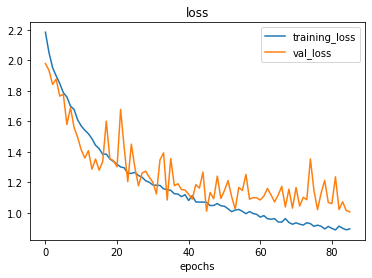

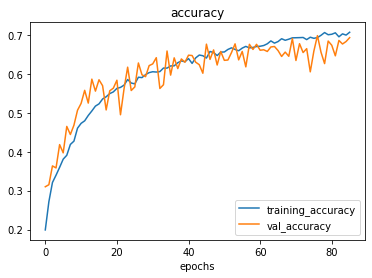

In [31]:
# Check out the loss and accuracy of model_1
plot_loss_curves(history_1)

### Making a prediction with the trained model 

In [32]:
# Remind ourselves of the classes our model is trained on 
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [39]:
# Downloand some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-11 06:37:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.03s   

2023-02-11 06:37:14 (126 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]

--2023-02-11 06:37:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [34]:
# Create a function to import and resize it to be able to be use with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
   to (img_shape, colour_channels),
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all value between 0 and 1)
  img = img/255.
  return img

In [35]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a predictio
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get the predicted class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
     pred_class = class_names[int(tf.round(pred[0]))]
 

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 28ms/step


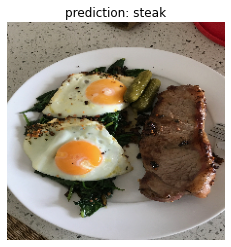

In [37]:
pred_and_plot(model_1,
              '03-steak.jpeg',
              class_names)

1/1 [==============================] - 0s 31ms/step


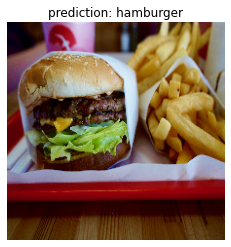

In [38]:
pred_and_plot(model_1,
              '03-hamburger.jpeg',
              class_names)

1/1 [==============================] - 0s 20ms/step


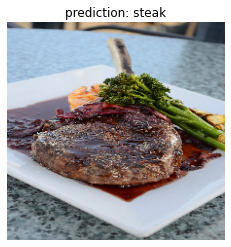

In [44]:
# 
pred_and_plot(model_1,
              '/content/alex-munsell-auIbTAcSH6E-unsplash.jpg',
              class_names)